In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

In [209]:
stud_math = stud_math.dropna(subset=['score'])
stud_math = stud_math.loc[stud_math['Fedu']<=4]
stud_math = stud_math.loc[stud_math['famrel']>=1]
stud_math = stud_math.loc[stud_math['absences']<40]

In [210]:
def for_num_col(x):
    display(x.hist())
    display(x.describe())
    IQR = x.quantile(0.75) - x.quantile(0.25)
    perc25 = x.quantile(0.25)
    perc75 = x.quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25),'75-й перцентиль: {},'.format(perc75),'IQR: {},'.format(IQR))
    print('Границы выбросов = [{f}, {i}]'.format(f=perc25 - 1.5*IQR, i=perc75 + 1.5*IQR))

In [211]:
def for_obj_col(col):
    x = pd.DataFrame(stud_math[col].value_counts())
    display(x)
    display(f'Количество непустых значений = {stud_math[col].count()}')
    display(x.plot(kind='bar', grid=True))
    fig, ax = plt.subplots()
    sns.boxplot(x=col, y='score', data=stud_math, ax=ax)

In [ ]:
def for_medu(x):
    
    if pd.isna(x):
        
    else:
        return x

In [212]:
display(stud_math.head())
display(stud_math.info())
display(stud_math.index)
stud_math.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               323 non-null    object 
 1   sex                  323 non-null    object 
 2   age                  323 non-null    int64  
 3   address              312 non-null    object 
 4   famsize              302 non-null    object 
 5   Pstatus              284 non-null    object 
 6   Medu                 320 non-null    float64
 7   Fedu                 323 non-null    float64
 8   Mjob                 306 non-null    object 
 9   Fjob                 295 non-null    object 
 10  reason               309 non-null    object 
 11  guardian             295 non-null    object 
 12  traveltime           300 non-null    float64
 13  studytime            318 non-null    float64
 14  failures             304 non-null    float64
 15  schoolsup            314 non-null    obj

None

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,
            ...
            384, 385, 386, 387, 388, 389, 391, 392, 393, 394],
           dtype='int64', length=323)

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.132905,-0.155314,0.062127,-0.029432,0.202665,0.029432,0.042820,0.007195,0.078026,-0.063742,0.167898,-0.141667
Medu,-0.132905,1.000000,0.647637,-0.177375,0.084955,-0.214527,-0.084955,-0.026988,0.002109,0.074218,-0.090542,0.151957,0.197247
Fedu,-0.155314,0.647637,1.000000,-0.175390,-0.002445,-0.254755,0.002445,-0.033587,-0.018398,0.031508,0.004969,0.053977,0.115337
traveltime,0.062127,-0.177375,-0.175390,1.000000,-0.123087,0.058043,0.123087,-0.065664,-0.001082,0.002838,-0.011578,-0.018243,-0.066856
studytime,-0.029432,0.084955,-0.002445,-0.123087,1.000000,-0.144694,-1.000000,0.022192,-0.126976,-0.059873,-0.089528,-0.084108,0.112203
failures,0.202665,-0.214527,-0.254755,0.058043,-0.144694,1.000000,0.144694,0.011596,0.112190,0.092584,0.069779,0.100471,-0.310685
"studytime, granular",0.029432,-0.084955,0.002445,0.123087,-1.000000,0.144694,1.000000,-0.022192,0.126976,0.059873,0.089528,0.084108,-0.112203
famrel,0.042820,-0.026988,-0.033587,-0.065664,0.022192,0.011596,-0.022192,1.000000,0.168120,0.076076,0.112052,-0.075090,0.046349
freetime,0.007195,0.002109,-0.018398,-0.001082,-0.126976,0.112190,0.126976,0.168120,1.000000,0.280926,0.089383,0.021588,0.017417
goout,0.078026,0.074218,0.031508,0.002838,-0.059873,0.092584,0.059873,0.076076,0.280926,1.000000,-0.018871,0.086424,-0.142265


<AxesSubplot:>

count    323.000000
mean      16.678019
std        1.266523
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,
Границы выбросов = [13.0, 21.0]


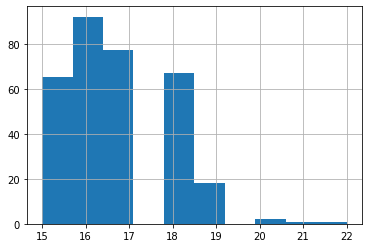

In [213]:
for_num_col(stud_math['age'])

# Столбец возраста:
Пропуски отсутствуют. Основная масса учеников в возрасте от 15 до 18 лет.
Есть незначительное число выбросов: те кто старше 21. Не вижу необходимости их удалять

<AxesSubplot:>

count    320.000000
mean       2.775000
std        1.099729
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,
Границы выбросов = [-1.0, 7.0]


array([ 4.,  1.,  3.,  2., nan,  0.])

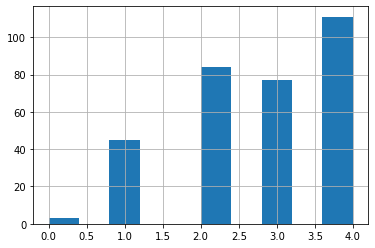

In [214]:
for_num_col(stud_math['Medu'])

#stud_math['Medu'] = stud_math['Medu'].apply(lambda x: 4 if pd.isna(x) else x)
stud_math['Medu'].unique()

# Столбец образования матери:
Есть 3 пропущеных значения. Видно что у большинства учеников матери достаточно образованны. У трети - имеют высшее образвание.
Выбросов и сомнительных значений нет.

<AxesSubplot:>

count    323.000000
mean       2.517028
std        1.092971
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,
Границы выбросов = [0.5, 4.5]


Int64Index([  3,   6,  14,  18,  22,  23,  26,  27,  34,  39,  40,  44,  48,
             50,  51,  52,  59,  62,  68,  71,  77,  82,  83,  86,  87,  88,
             93, 103, 106, 112, 113, 121, 124, 128, 132, 141, 146, 147, 153,
            156, 158, 162, 165, 166, 167, 168, 176, 178, 184, 186, 189, 192,
            203, 204, 212, 213, 219, 223, 226, 231, 235, 239, 249, 250, 256,
            262, 264, 268, 273, 275, 284, 294, 302, 303, 306, 313, 321, 322,
            324, 327, 330, 333, 334, 339, 343, 345, 357, 364, 370, 371, 372,
            376, 384, 385, 393],
           dtype='int64')

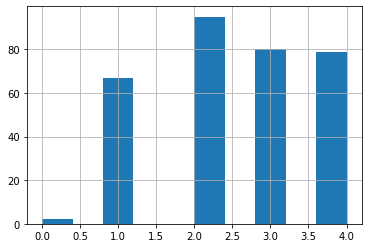

In [216]:
for_num_col(stud_math['Fedu'])


# Столбец образования отца:
Есть около 20 пропущеных значений. Также есть выбросы, из-за которых на графике сложно детально рассмотреть распределение признака. Необходимо предварительно удалить значения больше 4 и повторно пострить график.
Как видим образованиеу отцов в среднем ниже чем у матерей.

<AxesSubplot:>

count    323.000000
mean       1.436533
std        0.694810
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,
Границы выбросов = [-0.5, 3.5]


array([2., 1., 3., 4.])

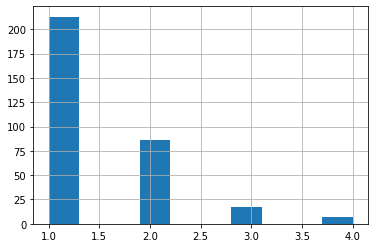

In [193]:
for_num_col(stud_math['traveltime'])
stud_math['traveltime'] = stud_math['traveltime'].apply(lambda x: 1 if pd.isna(x) else x)
stud_math['traveltime'].unique()

# Столбец времени пути до школы:
Есть около 30 пропусков, что составляет чуть менее 10% от общего количества значений. Не является критичным такое количество пропусков. Исходя из формулы, выбросы присутствуют, однако руководствуясь пояснительной таблицей видим что значения до 4 являются допустимыми, ничего удалять не нужно. В дальнейшем будем считать что выбросов нет если значения в рамках предусмотренных таблицей. По графику видно что большинство детей живет в 15 минутах ходьбы до школы. Дольше часа до школы добираются единицы учеников.

<AxesSubplot:>

count    323.000000
mean       2.027864
std        0.850190
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,
Границы выбросов = [-0.5, 3.5]


array([2., 3., 1., 4.])

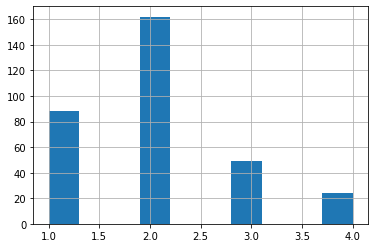

In [195]:
for_num_col(stud_math['studytime'])
stud_math['studytime'] = stud_math['studytime'].apply(lambda x: 2 if pd.isna(x) else x)
stud_math['studytime'].unique()

# Столбец времени на учебу вне школы в неделю:
Есть немного пропусков. Выбросов нет. Из графика видно что большинство учеников проводят меньше 5 часов в неделю на учебу вне школы, и лишь немногая часть (около 25 человек) - больше 10 часов.

<AxesSubplot:>

count    323.000000
mean       0.356037
std        0.726721
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,
Границы выбросов = [0.0, 0.0]


array([0., 3., 1., 2.])

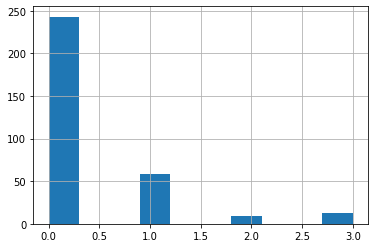

In [198]:
for_num_col(stud_math['failures'])
stud_math['failures'] = stud_math['failures'].apply(lambda x: 1 if pd.isna(x) else x)
stud_math['failures'].unique()

# Столбец внешкольных неудач:
Есть около 20 пропусков. Выбросов нет. Подавляющее большинство учеников не имеет проблем вне школы.

<AxesSubplot:>

count    323.000000
mean      -6.083591
std        2.550571
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,
Границы выбросов = [-10.5, 1.5]


array([ -6.,  -9.,  -3., -12.])

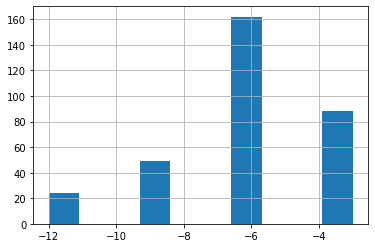

In [200]:
for_num_col(stud_math['studytime, granular'])
stud_math['studytime, granular'] = stud_math['studytime, granular'].apply(lambda x: -6 if pd.isna(x) else x)
stud_math['studytime, granular'].unique()

<AxesSubplot:>

count    323.000000
mean       3.950464
std        0.907538
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,
Границы выбросов = [2.5, 6.5]


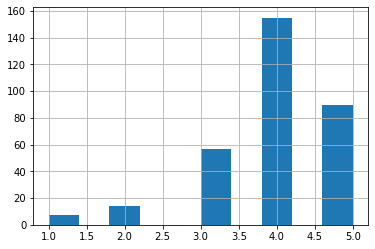

In [143]:
for_num_col(stud_math['famrel'])


# Столбец отношений внутри семьи:
Присутствуют пропуски (менее 30). Выбросов нет. Как видно у большинства отношения в семье хорошие. Лишь около 10% учеников имеют проблемы внутри семьи.

<AxesSubplot:>

count    323.000000
mean       3.213622
std        0.991047
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,
Границы выбросов = [1.5, 5.5]


array([3., 2., 4., 1., 5.])

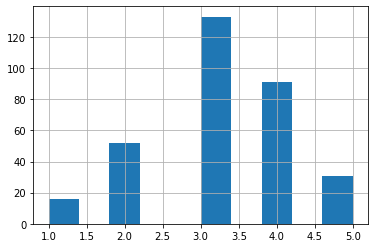

In [202]:
for_num_col(stud_math['freetime'])
stud_math['freetime'] = stud_math['freetime'].apply(lambda x: 3 if pd.isna(x) else x)
stud_math['freetime'].unique()

# Столбец свободного времени у учеников:
Пропусков мало (около 10). Выбросов нет. В целом средние показатели у большинства учащихся. Лишь у единиц почти нет свободного времени. 

<AxesSubplot:>

count    323.000000
mean       3.083591
std        1.090249
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,
Границы выбросов = [-1.0, 7.0]


array([4., 3., 2., 1., 5.])

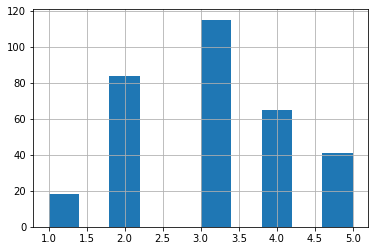

In [204]:
for_num_col(stud_math['goout'])
stud_math['goout'] = stud_math['goout'].apply(lambda x: 3 if pd.isna(x) else x)
stud_math['goout'].unique()

# Столбец проведения времени с друзьями:
Пропусков мало. Выбросов нет. Опять средние показатели, крайне мало учеников не проводят достаточно времени с друзьями.

<AxesSubplot:>

count    323.000000
mean       3.538700
std        1.392377
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,
Границы выбросов = [0.0, 8.0]


array([3., 5., 1., 2., 4.])

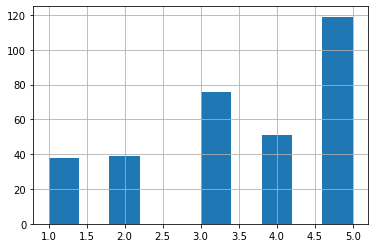

In [206]:
for_num_col(stud_math['health'])
stud_math['health'] = stud_math['health'].apply(lambda x: 5 if pd.isna(x) else x)
stud_math['health'].unique()

# Столбец здоровья:
Пропусков около 15. Выбросов нет. Больше трети учеников абсолютно здоровы. Явные проблемы со здоровьем примерно у четверти учеников, считаю это многовато. У остальных средние показатели.

<AxesSubplot:>

count    323.000000
mean       5.164087
std        6.032599
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       38.000000
Name: absences, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,
Границы выбросов = [-12.0, 20.0]


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


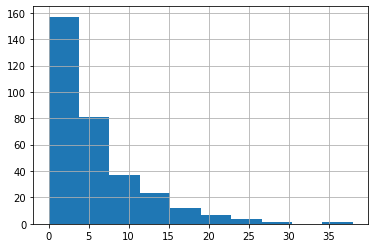

In [207]:
for_num_col(stud_math['absences'])

stud_math['absences'].unique()
display(stud_math.loc[stud_math['absences']<40])

# Столбец количества пропущенных занятий:
Пропусков в столбце не много, около 10. Есть выбросы - возможно это единичные прогульщики, их показатели могут сбивать будущую модель, так что думаю есть смысл от них избавиться. Верхней границей выброса возьму 40 пропусков, больше чем в формуле, т.к. много у кого больше 20 но меньше 40 пропусков.

<AxesSubplot:>

count    323.000000
mean      52.167183
std       22.494511
min        0.000000
25%       42.500000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

25-й перцентиль: 42.5, 75-й перцентиль: 65.0, IQR: 22.5,
Границы выбросов = [8.75, 98.75]


50.0     50
55.0     40
0.0      30
65.0     28
60.0     25
75.0     25
70.0     23
40.0     23
45.0     19
80.0     16
30.0     14
90.0     10
35.0      8
25.0      5
85.0      3
95.0      2
100.0     1
20.0      1
Name: score, dtype: int64

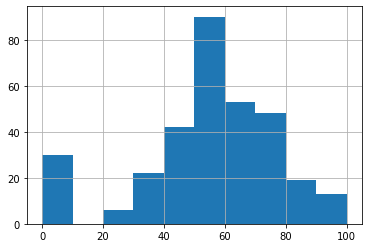

In [148]:
for_num_col(stud_math['score'])

stud_math['score'].value_counts()

# Столбец набранных баллов по экзамену:
Есть пару пропусков. Выбросов нет. График симметричный. Большинство учеников сдали экзамен средне. Этот столбец является для нас целевым, так что пропусков быть не должно.

In [149]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.132905,-0.155314,0.062127,-0.029432,0.202665,0.029432,0.042820,0.007195,0.078026,-0.063742,0.167898,-0.141667
Medu,-0.132905,1.000000,0.647637,-0.177375,0.084955,-0.214527,-0.084955,-0.026988,0.002109,0.074218,-0.090542,0.151957,0.197247
Fedu,-0.155314,0.647637,1.000000,-0.175390,-0.002445,-0.254755,0.002445,-0.033587,-0.018398,0.031508,0.004969,0.053977,0.115337
traveltime,0.062127,-0.177375,-0.175390,1.000000,-0.123087,0.058043,0.123087,-0.065664,-0.001082,0.002838,-0.011578,-0.018243,-0.066856
studytime,-0.029432,0.084955,-0.002445,-0.123087,1.000000,-0.144694,-1.000000,0.022192,-0.126976,-0.059873,-0.089528,-0.084108,0.112203
failures,0.202665,-0.214527,-0.254755,0.058043,-0.144694,1.000000,0.144694,0.011596,0.112190,0.092584,0.069779,0.100471,-0.310685
"studytime, granular",0.029432,-0.084955,0.002445,0.123087,-1.000000,0.144694,1.000000,-0.022192,0.126976,0.059873,0.089528,0.084108,-0.112203
famrel,0.042820,-0.026988,-0.033587,-0.065664,0.022192,0.011596,-0.022192,1.000000,0.168120,0.076076,0.112052,-0.075090,0.046349
freetime,0.007195,0.002109,-0.018398,-0.001082,-0.126976,0.112190,0.126976,0.168120,1.000000,0.280926,0.089383,0.021588,0.017417
goout,0.078026,0.074218,0.031508,0.002838,-0.059873,0.092584,0.059873,0.076076,0.280926,1.000000,-0.018871,0.086424,-0.142265


In [150]:
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


,school
GP,285
MS,38


'Количество непустых значений = 323'

<AxesSubplot:>

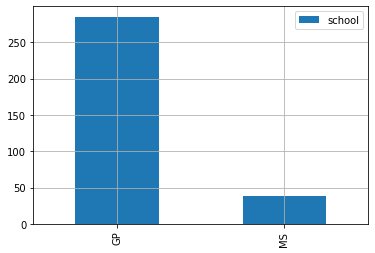

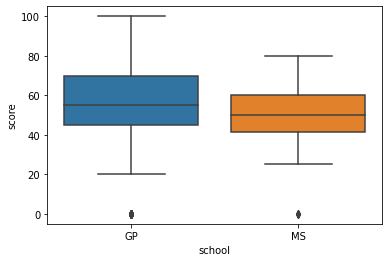

In [166]:
for_obj_col('school')


,sex
F,173
M,150


'Количество непустых значений = 323'

<AxesSubplot:>

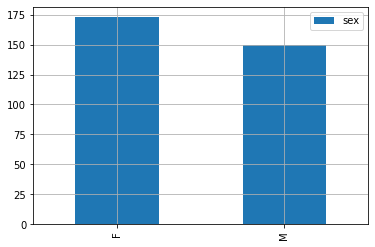

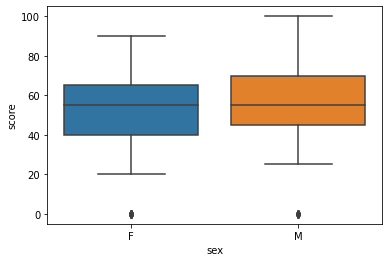

In [167]:
for_obj_col('sex')

,address
U,243
R,69


'Количество непустых значений = 312'

<AxesSubplot:>

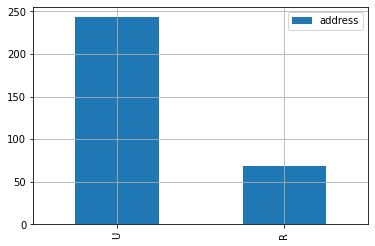

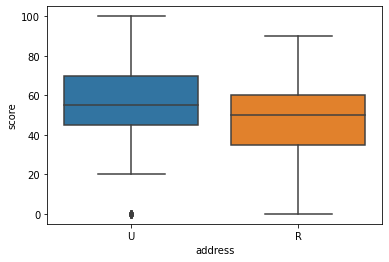

In [168]:
for_obj_col('address')

,famsize
GT3,215
LE3,87


'Количество непустых значений = 302'

<AxesSubplot:>

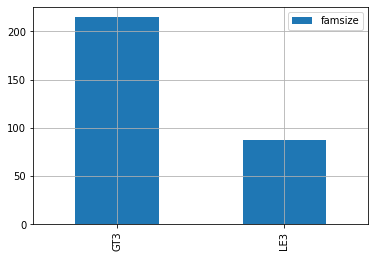

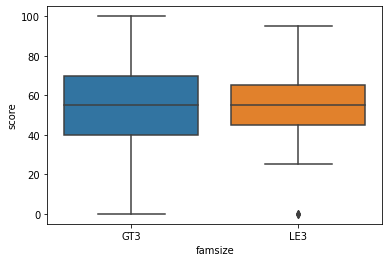

In [169]:
for_obj_col('famsize')

,Pstatus
T,257
A,27


'Количество непустых значений = 284'

<AxesSubplot:>

array(['A', nan, 'T'], dtype=object)

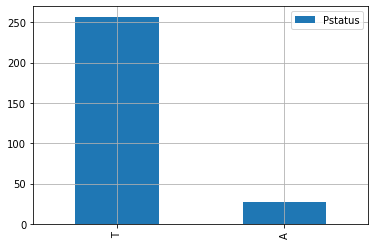

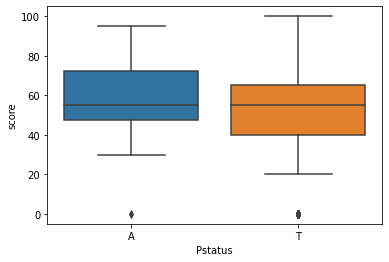

In [171]:
for_obj_col('Pstatus')
stud_math['Pstatus'].unique()

,Mjob
other,106
services,77
at_home,51
teacher,43
health,29


'Количество непустых значений = 306'

<AxesSubplot:>

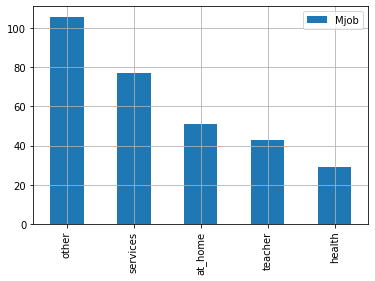

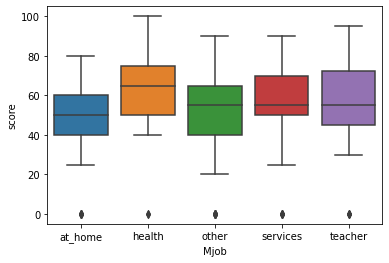

In [172]:
for_obj_col('Mjob')

,Fjob
other,167
services,81
teacher,23
at_home,14
health,10


'Количество непустых значений = 295'

<AxesSubplot:>

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

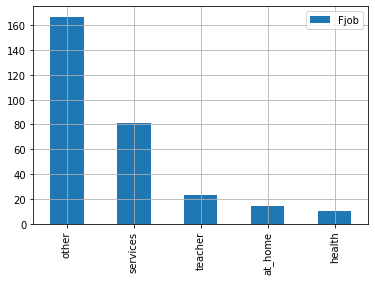

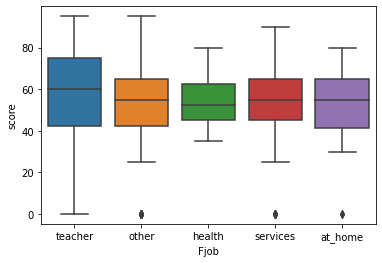

In [174]:
for_obj_col('Fjob')
stud_math['Fjob'].unique()

,reason
course,107
home,86
reputation,86
other,30


'Количество непустых значений = 309'

<AxesSubplot:>

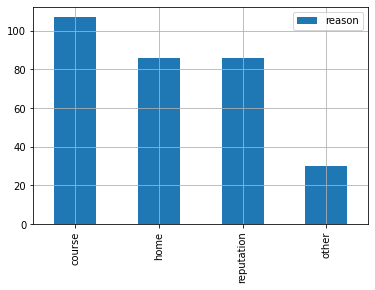

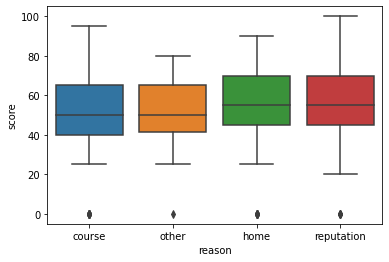

In [175]:
for_obj_col('reason')

,guardian
mother,205
father,70
other,20


'Количество непустых значений = 295'

<AxesSubplot:>

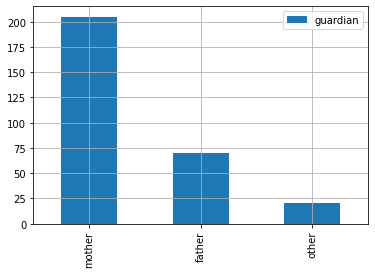

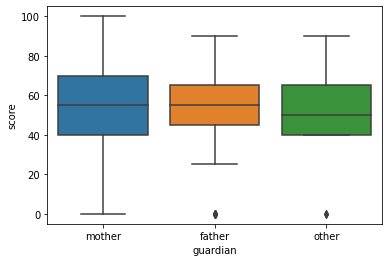

In [176]:
for_obj_col('guardian')

,schoolsup
no,275
yes,39


'Количество непустых значений = 314'

<AxesSubplot:>

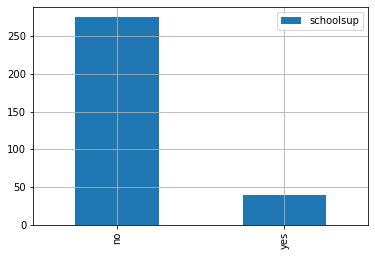

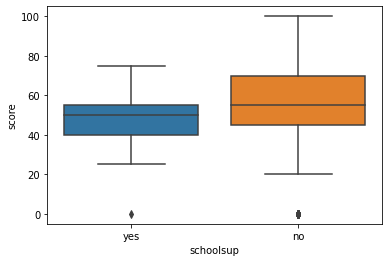

In [177]:
for_obj_col('schoolsup')

,famsup
yes,176
no,115


'Количество непустых значений = 291'

<AxesSubplot:>

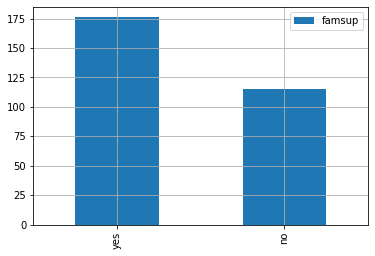

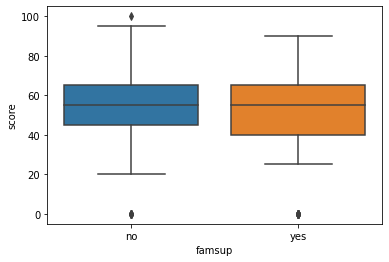

In [178]:
for_obj_col('famsup')

,paid
no,163
yes,127


'Количество непустых значений = 290'

<AxesSubplot:>

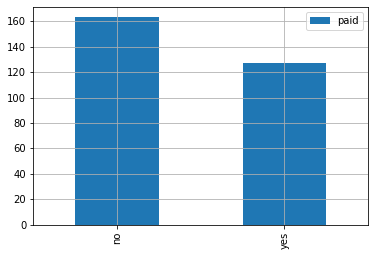

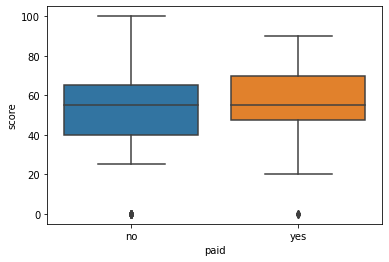

In [179]:
for_obj_col('paid')

,activities
yes,159
no,152


'Количество непустых значений = 311'

<AxesSubplot:>

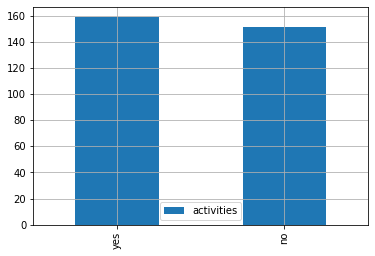

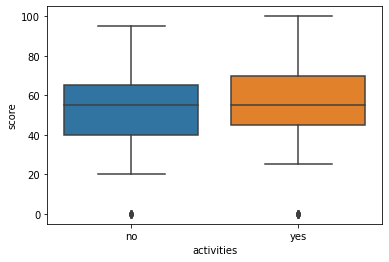

In [180]:
for_obj_col('activities')

,nursery
yes,244
no,64


'Количество непустых значений = 308'

<AxesSubplot:>

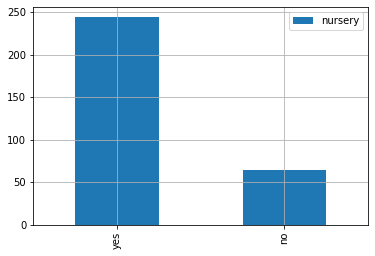

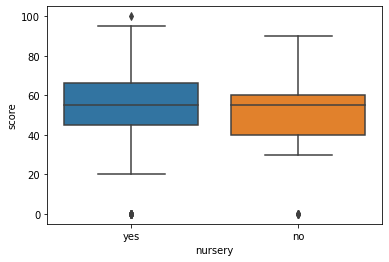

In [181]:
for_obj_col('nursery')

,higher
yes,292
no,15


'Количество непустых значений = 307'

<AxesSubplot:>

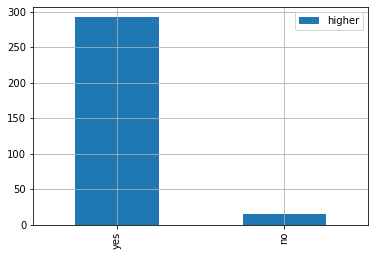

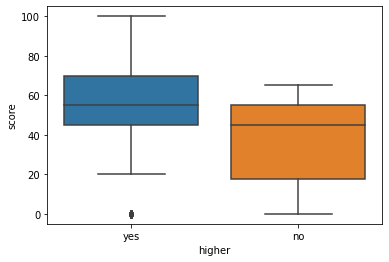

In [182]:
for_obj_col('higher')

,internet
yes,245
no,48


'Количество непустых значений = 293'

<AxesSubplot:>

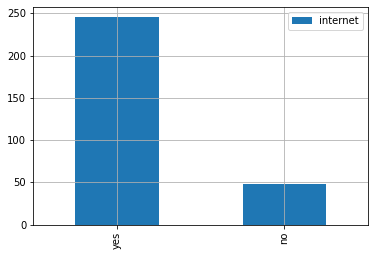

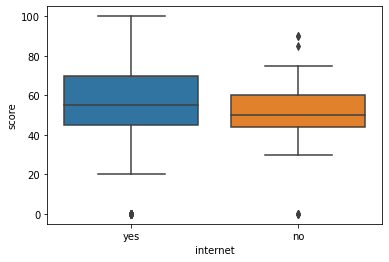

In [183]:
for_obj_col('internet')

,romantic
no,197
yes,100


'Количество непустых значений = 297'

<AxesSubplot:>

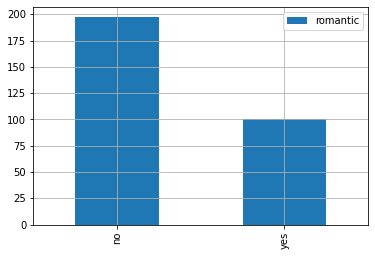

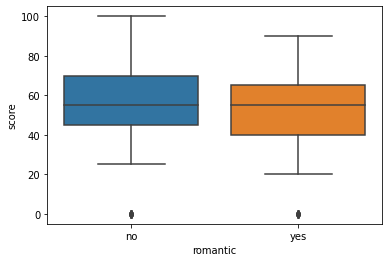

In [184]:
for_obj_col('romantic')

<ipython-input-97-c8b2e1382e84>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


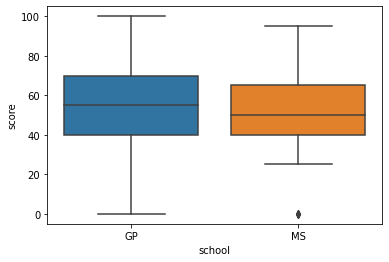

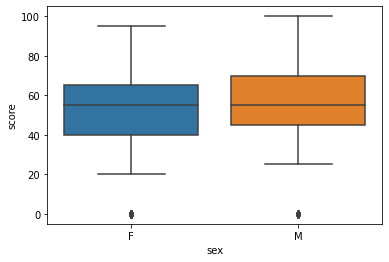

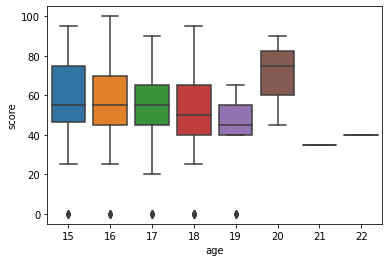

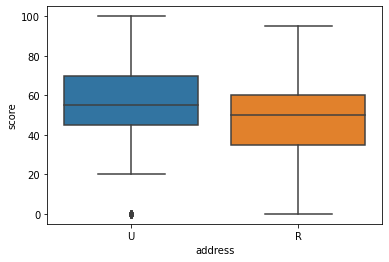

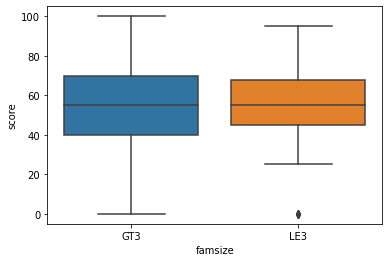

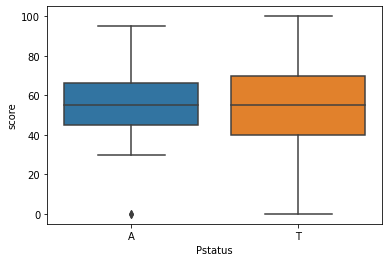

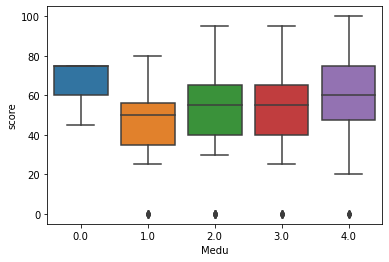

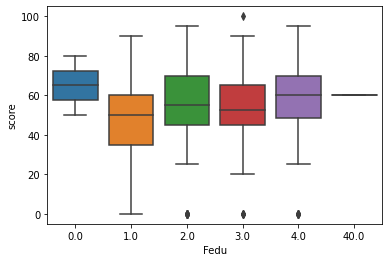

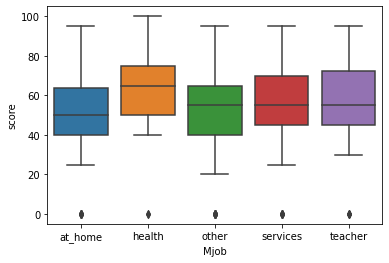

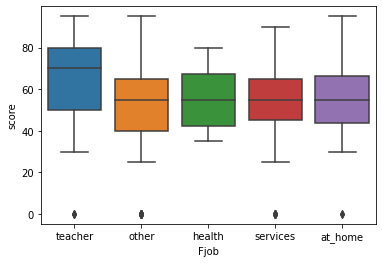

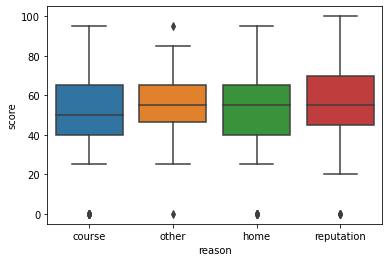

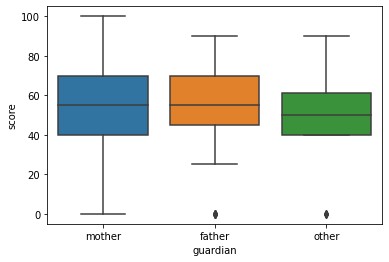

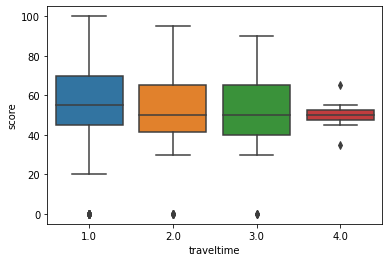

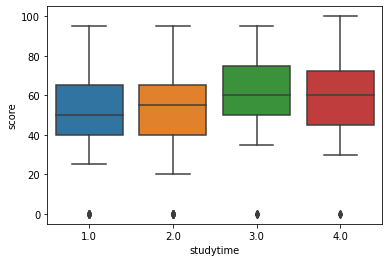

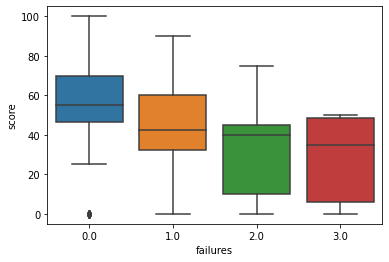

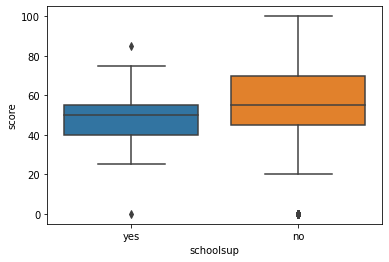

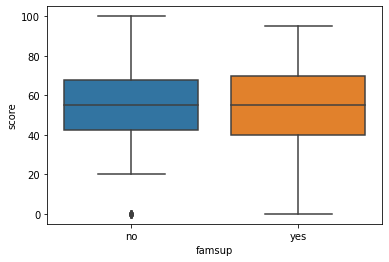

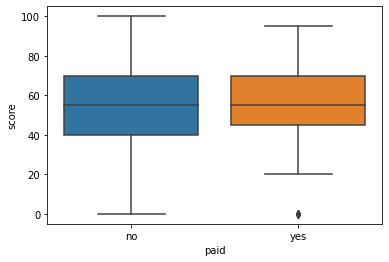

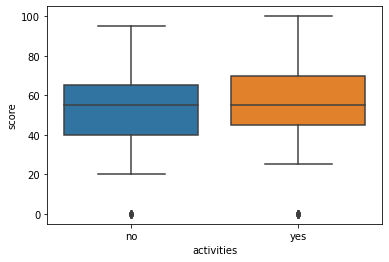

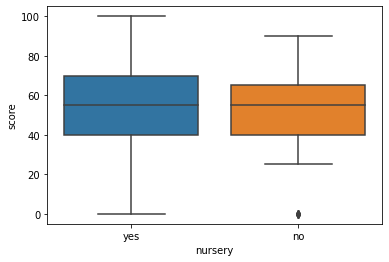

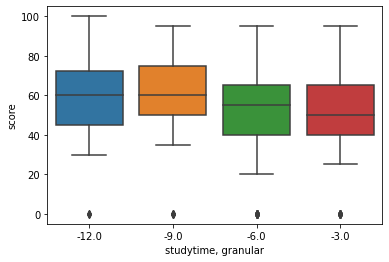

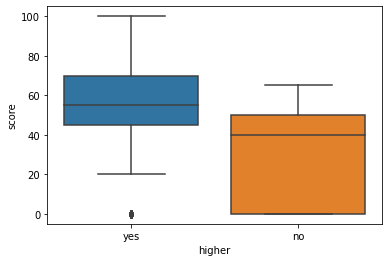

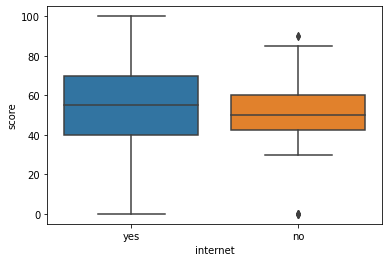

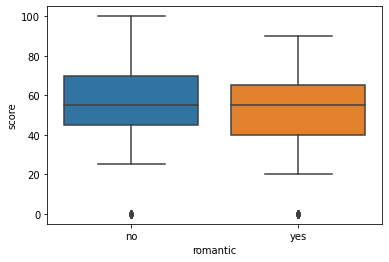

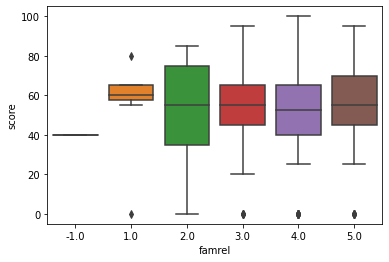

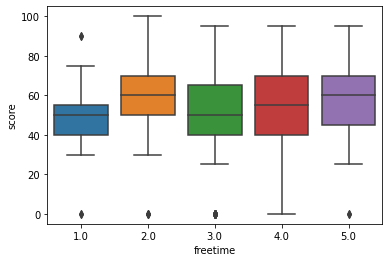

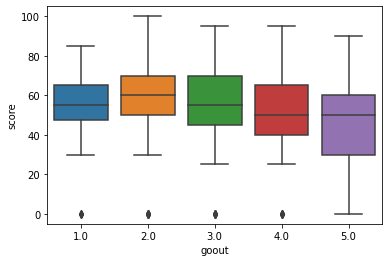

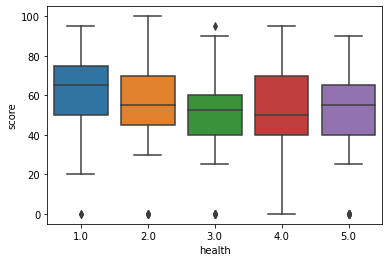

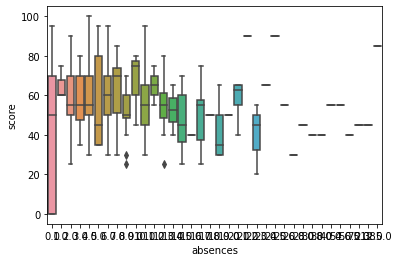

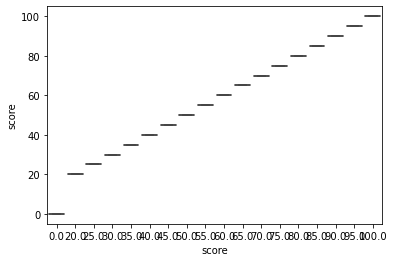

In [97]:
def boxplt(c):
    fig, ax = plt.subplots()
    sns.boxplot(x=c, y='score', data=stud_math, ax=ax)
    
for col in stud_math.columns:
    boxplt(col)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [60]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.140946,-0.147952,0.075939,-0.018792,0.217586,0.018792,0.060489,0.006587,0.108975,-0.045074,0.095943,-0.161141
Medu,-0.140946,1.000000,0.626536,-0.170753,0.098771,-0.249200,-0.098771,-0.002411,0.022699,0.063034,-0.061885,-0.020096,0.211689
Fedu,-0.147952,0.626536,1.000000,-0.142170,0.013009,-0.272352,-0.013009,-0.017838,-0.012749,0.054938,0.017321,0.021570,0.130002
traveltime,0.075939,-0.170753,-0.142170,1.000000,-0.106363,0.040001,0.106363,-0.044073,-0.017034,0.028151,-0.004054,-0.051869,-0.073556
studytime,-0.018792,0.098771,0.013009,-0.106363,1.000000,-0.162614,-1.000000,0.047205,-0.121602,-0.038350,-0.072145,-0.018021,0.128166
failures,0.217586,-0.249200,-0.272352,0.040001,-0.162614,1.000000,0.162614,-0.039503,0.083796,0.097723,0.088108,0.059902,-0.339042
"studytime, granular",0.018792,-0.098771,-0.013009,0.106363,-1.000000,0.162614,1.000000,-0.047205,0.121602,0.038350,0.072145,0.018021,-0.128166
famrel,0.060489,-0.002411,-0.017838,-0.044073,0.047205,-0.039503,-0.047205,1.000000,0.177314,0.082902,0.082373,-0.081489,0.046938
freetime,0.006587,0.022699,-0.012749,-0.017034,-0.121602,0.083796,0.121602,0.177314,1.000000,0.283299,0.075459,0.007436,0.016659
goout,0.108975,0.063034,0.054938,0.028151,-0.038350,0.097723,0.038350,0.082902,0.283299,1.000000,0.003284,-0.060115,-0.146567
